<a href="https://colab.research.google.com/github/ShynPham/food-vision-detection-/blob/main/foodvision101_with_YOLO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Since the `train.py` script is looking for `data.yaml`file inside the yolo directory, and our datasets is downloaded in yolo format, we need first to download the model and then download the dataset

In [ ]:
# Download yolov8
!git clone https://github.com/ultralytics/ultralytics.git
%cd ultralytics

Cloning into 'ultralytics'...
remote: Enumerating objects: 69228, done.
remote: Counting objects: 100% (1190/1190), done.
remote: Compressing objects: 100% (565/565), done.
remote: Total 69228 (delta 993), reused 635 (delta 625), pack-reused 68038 (from 3)
Receiving objects: 100% (69228/69228), 36.96 MiB | 11.71 MiB/s, done.
Resolving deltas: 100% (51688/51688), done.
/content/ultralytics


# 1. Getting the datasets


In [ ]:
# Dataset download from https://universe.roboflow.com/nutriscanfooddetection/food-detection-qosao/dataset/2

!pip install roboflow

from roboflow import Roboflow
from google.colab import userdata

# Access your API key from Google Colab secrets
# Make sure you have stored your Roboflow API key with the name #name
rf = Roboflow(api_key=userdata.get('ROBO_FOLOW'))
project = rf.workspace("nutriscanfooddetection").project("food-detection-qosao")
version = project.version(2)
dataset = version.download("yolov8")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.7/88.7 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 14.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 81.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 128.9 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.12.0.88
    Uninstalling opencv-python-headless-4.12.0.88:
      Successfully uninstalled opencv-python-headless-4.12.0.88
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Food-Detection-2 in yolov8:: 100%|██████████| 3409/3409 [00:00<00:00, 5437.83it/s]


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


# Understand the dataset

In [ ]:
import os

# Define the path to the downloaded dataset
dataset_path = '/content/ultralytics/Food-Detection-2'

# List the contents of the downloaded dataset directory
print("Contents of the downloaded dataset directory:")
print(os.listdir(dataset_path))

# Print the contents of the data.yaml file
data_yaml_path = os.path.join(dataset_path, 'data.yaml')
print("\nContents of data.yaml:")
with open(data_yaml_path, 'r') as f:
    print(f.read())

# Count the number of images and labels in the train and validation directories
train_images_count = len(os.listdir(os.path.join(dataset_path, 'train', 'images')))
train_labels_count = len(os.listdir(os.path.join(dataset_path, 'train', 'labels')))
val_images_count = len(os.listdir(os.path.join(dataset_path, 'valid', 'images')))
val_labels_count = len(os.listdir(os.path.join(dataset_path, 'valid', 'labels')))

print(f"\nNumber of training images: {train_images_count}")
print(f"Number of training labels: {train_labels_count}")
print(f"Number of validation images: {val_images_count}")
print(f"Number of validation labels: {val_labels_count}")

Contents of the downloaded dataset directory:
['data.yaml', 'valid', 'train', 'README.roboflow.txt', 'README.dataset.txt']

Contents of data.yaml:
names:
- apple_pie
- chocolate_cake
- donuts
- falafel
- french_fries
- hot_dog
- ice_cream
- nachos
- onion_rings
- pancakes
- pizza
- ravioli
- samosa
- spring_rolls
- strawberry_shortcake
- tacos
- waffles
nc: 17
roboflow:
  license: CC BY 4.0
  project: food-detection-qosao
  url: https://universe.roboflow.com/nutriscanfooddetection/food-detection-qosao/dataset/2
  version: 2
  workspace: nutriscanfooddetection
test: ../test/images
train: ../train/images
val: ../valid/images


Number of training images: 1189
Number of training labels: 1189
Number of validation images: 511
Number of validation labels: 511


Since the datasets is already being split between train and test, we don't have to worry about spliting it and move it anymore

# 2. Visualize the random images and its annotation within the dataset
--SKIPED--

Since the datasets is already download within the YOLO format, we can skip this step

# 3. Transform and define and apply transformation

--SKIPED --


Since the datasets is already download within the YOLO format, we can skip this step

# 4. Create DataLoader

--SKIPED --


Since the datasets is already download within the YOLO format, we can skip this step

# 5. Define and train model


Load a model

In [ ]:
from ultralytics import YOLO

model = YOLO("yolov8n.pt")



Train the model

In [ ]:
results = model.train(data=os.path.join(dataset_path, "data.yaml"), epochs=100, imgsz=640)

Ultralytics 8.3.203 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/ultralytics/Food-Detection-2/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0

# 6. Evaluate the trained model

In [ ]:
# Evaluate the trained model on the validation set
metrics = model.val()
print(metrics.box.map)

Ultralytics 8.3.203 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,008,963 parameters, 0 gradients
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 924.8±345.8 MB/s, size: 44.5 KB)
val: Scanning /content/ultralytics/Food-Detection-2/valid/labels.cache... 511 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 511/511 1.1Mit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 32/32 3.0it/s 10.8s
                   all        511        945      0.695      0.544      0.633      0.455
             apple_pie         28         28       0.46      0.536      0.414      0.298
        chocolate_cake         29         30      0.814      0.733      0.824      0.611
                donuts         27        134      0.692       0.57      0.638      0.469
               falafel         19         71        0.9      0.732      0.824      0.622
          french_fries         33        

# 7. Make predictions on random images

In [ ]:
import glob
import os

# Make predictions on a few images
# You can specify a source (e.g., a directory, a file, or a URL)
# Here, we'll use a few images from the validation set for demonstration
source_images = glob.glob(os.path.join(dataset_path, 'valid', 'images', '*'))[:5] # Get the first 5 images from the validation set

# Run inference on the selected images
results = model.predict(source=source_images, save=True) # save=True will save the predicted images with bounding boxes


0: 640x640 2 chocolate_cakes, 7.9ms
1: 640x640 3 pancakess, 7.9ms
2: 640x640 1 ice_cream, 7.9ms
3: 640x640 7 samosas, 7.9ms
4: 640x640 1 chocolate_cake, 7.9ms
Speed: 3.2ms preprocess, 7.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)
Results saved to /content/ultralytics/runs/detect/train3


# 8. Visualize the predictions

Displaying runs/detect/train2/val_batch0_labels.jpg


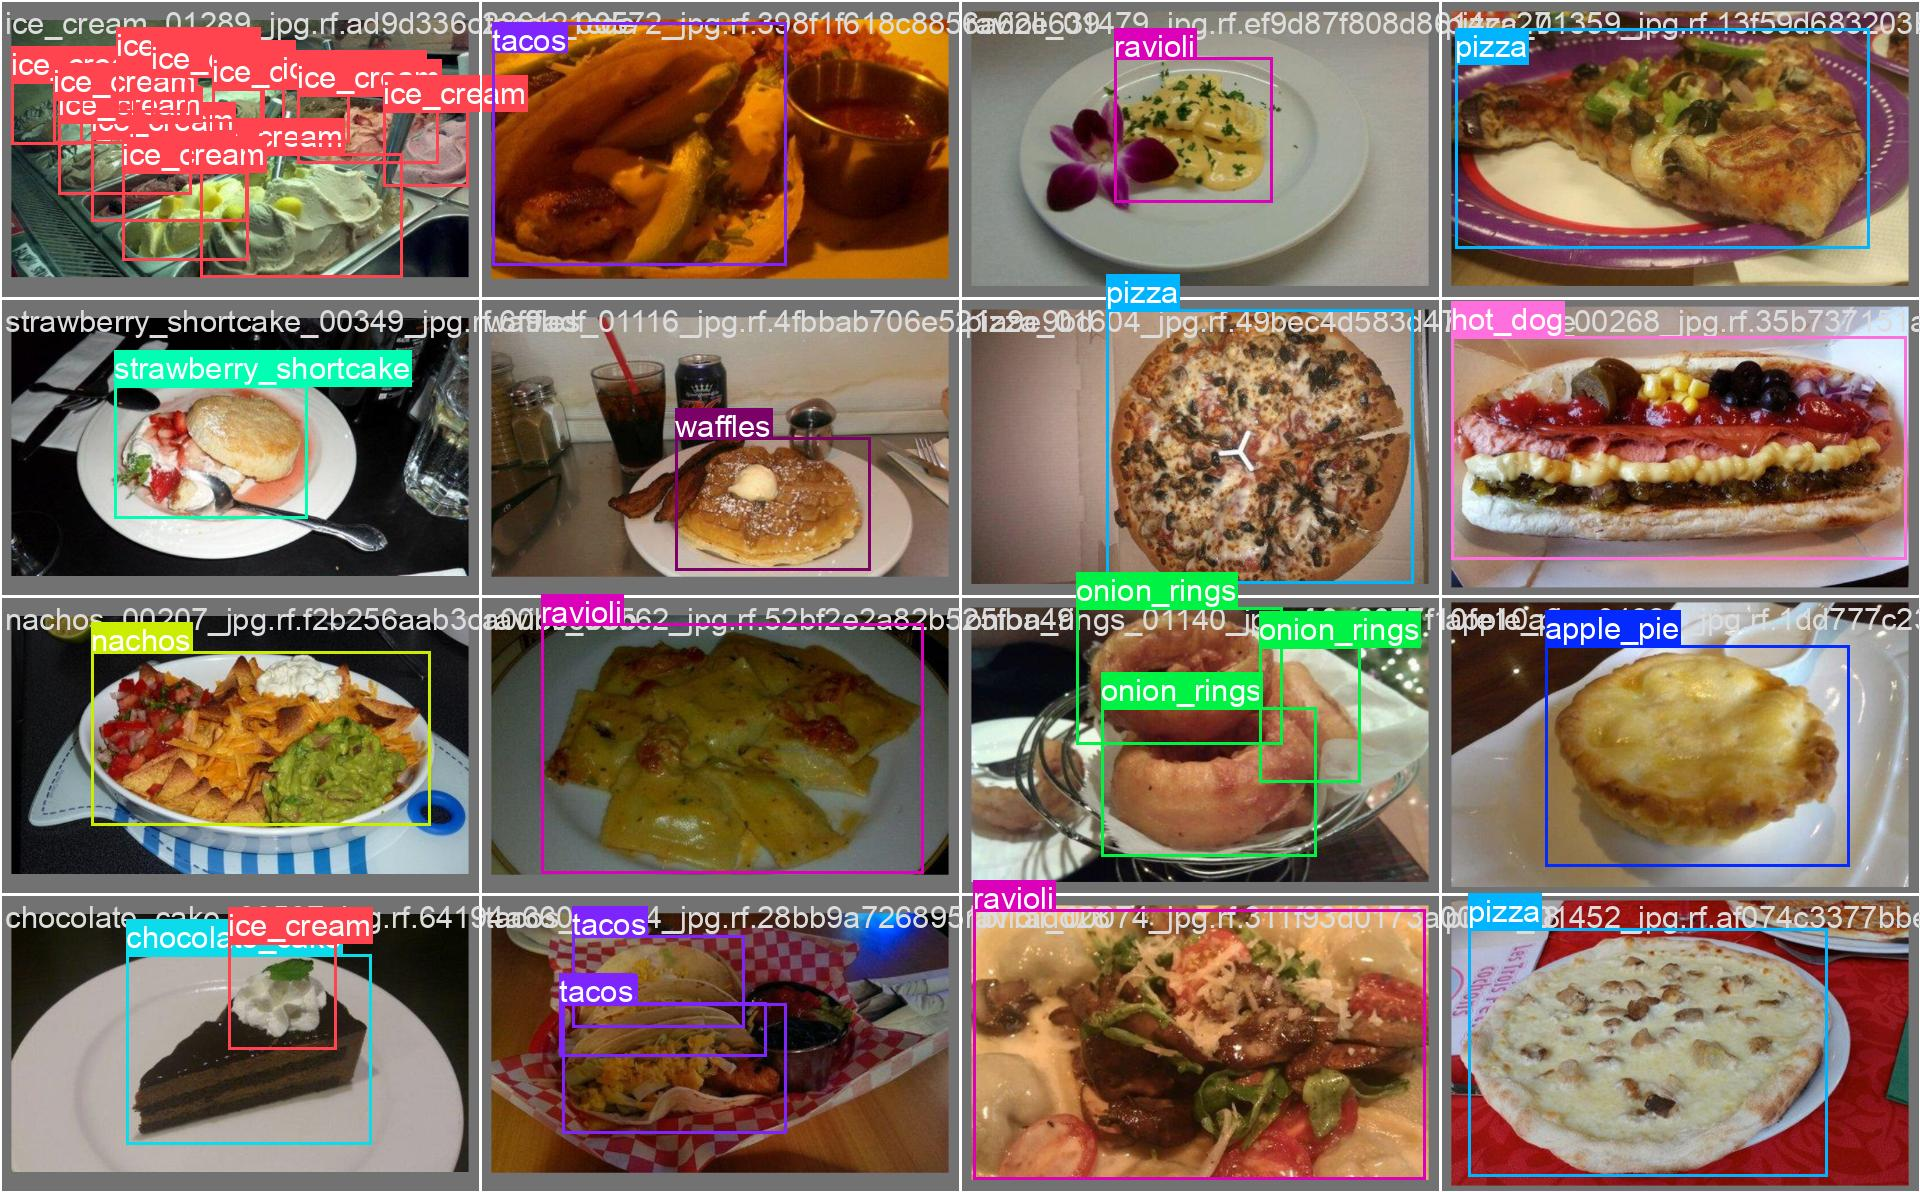

Displaying runs/detect/train2/val_batch1_labels.jpg


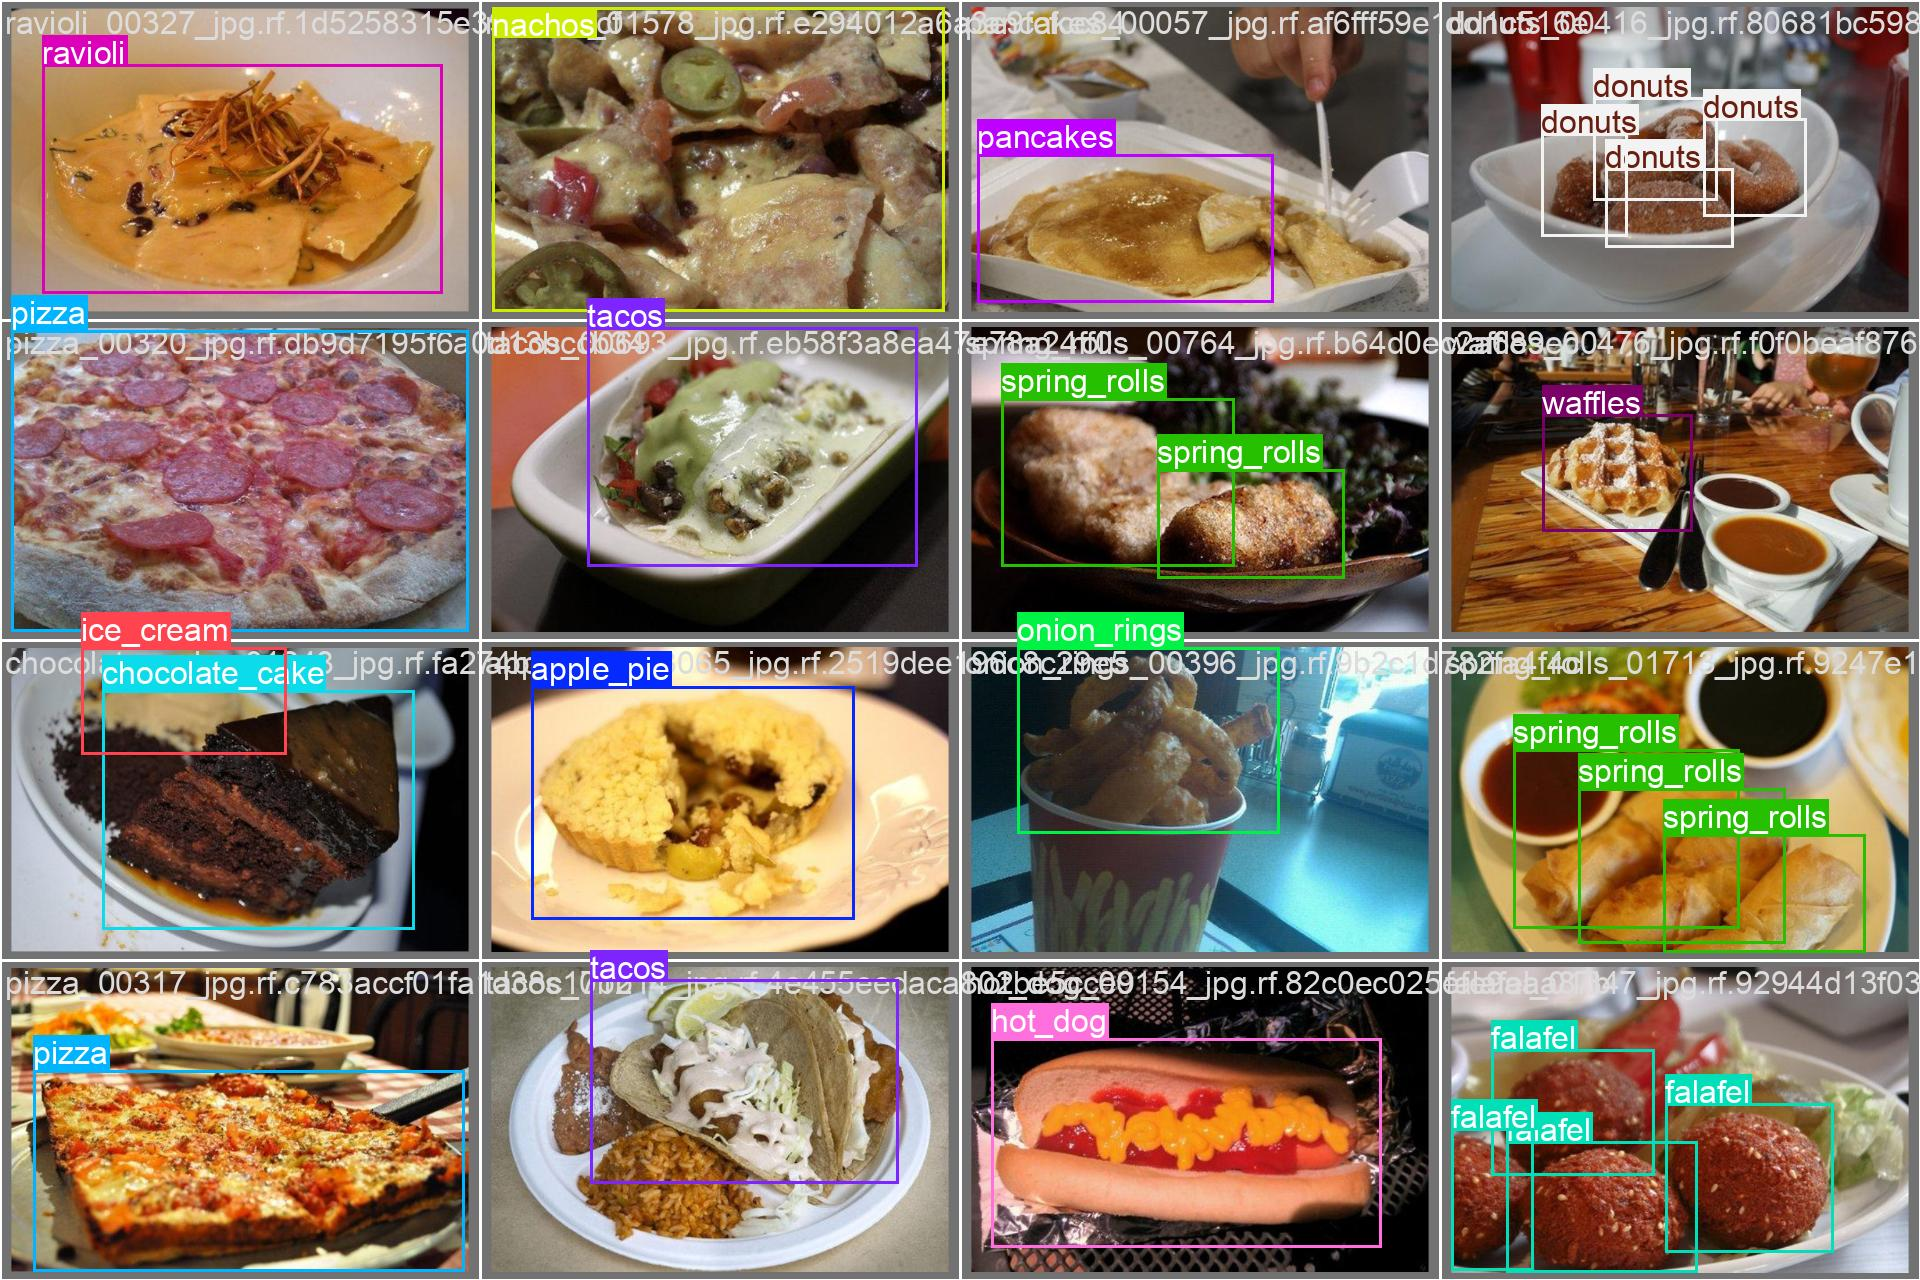

Displaying runs/detect/train2/val_batch2_pred.jpg


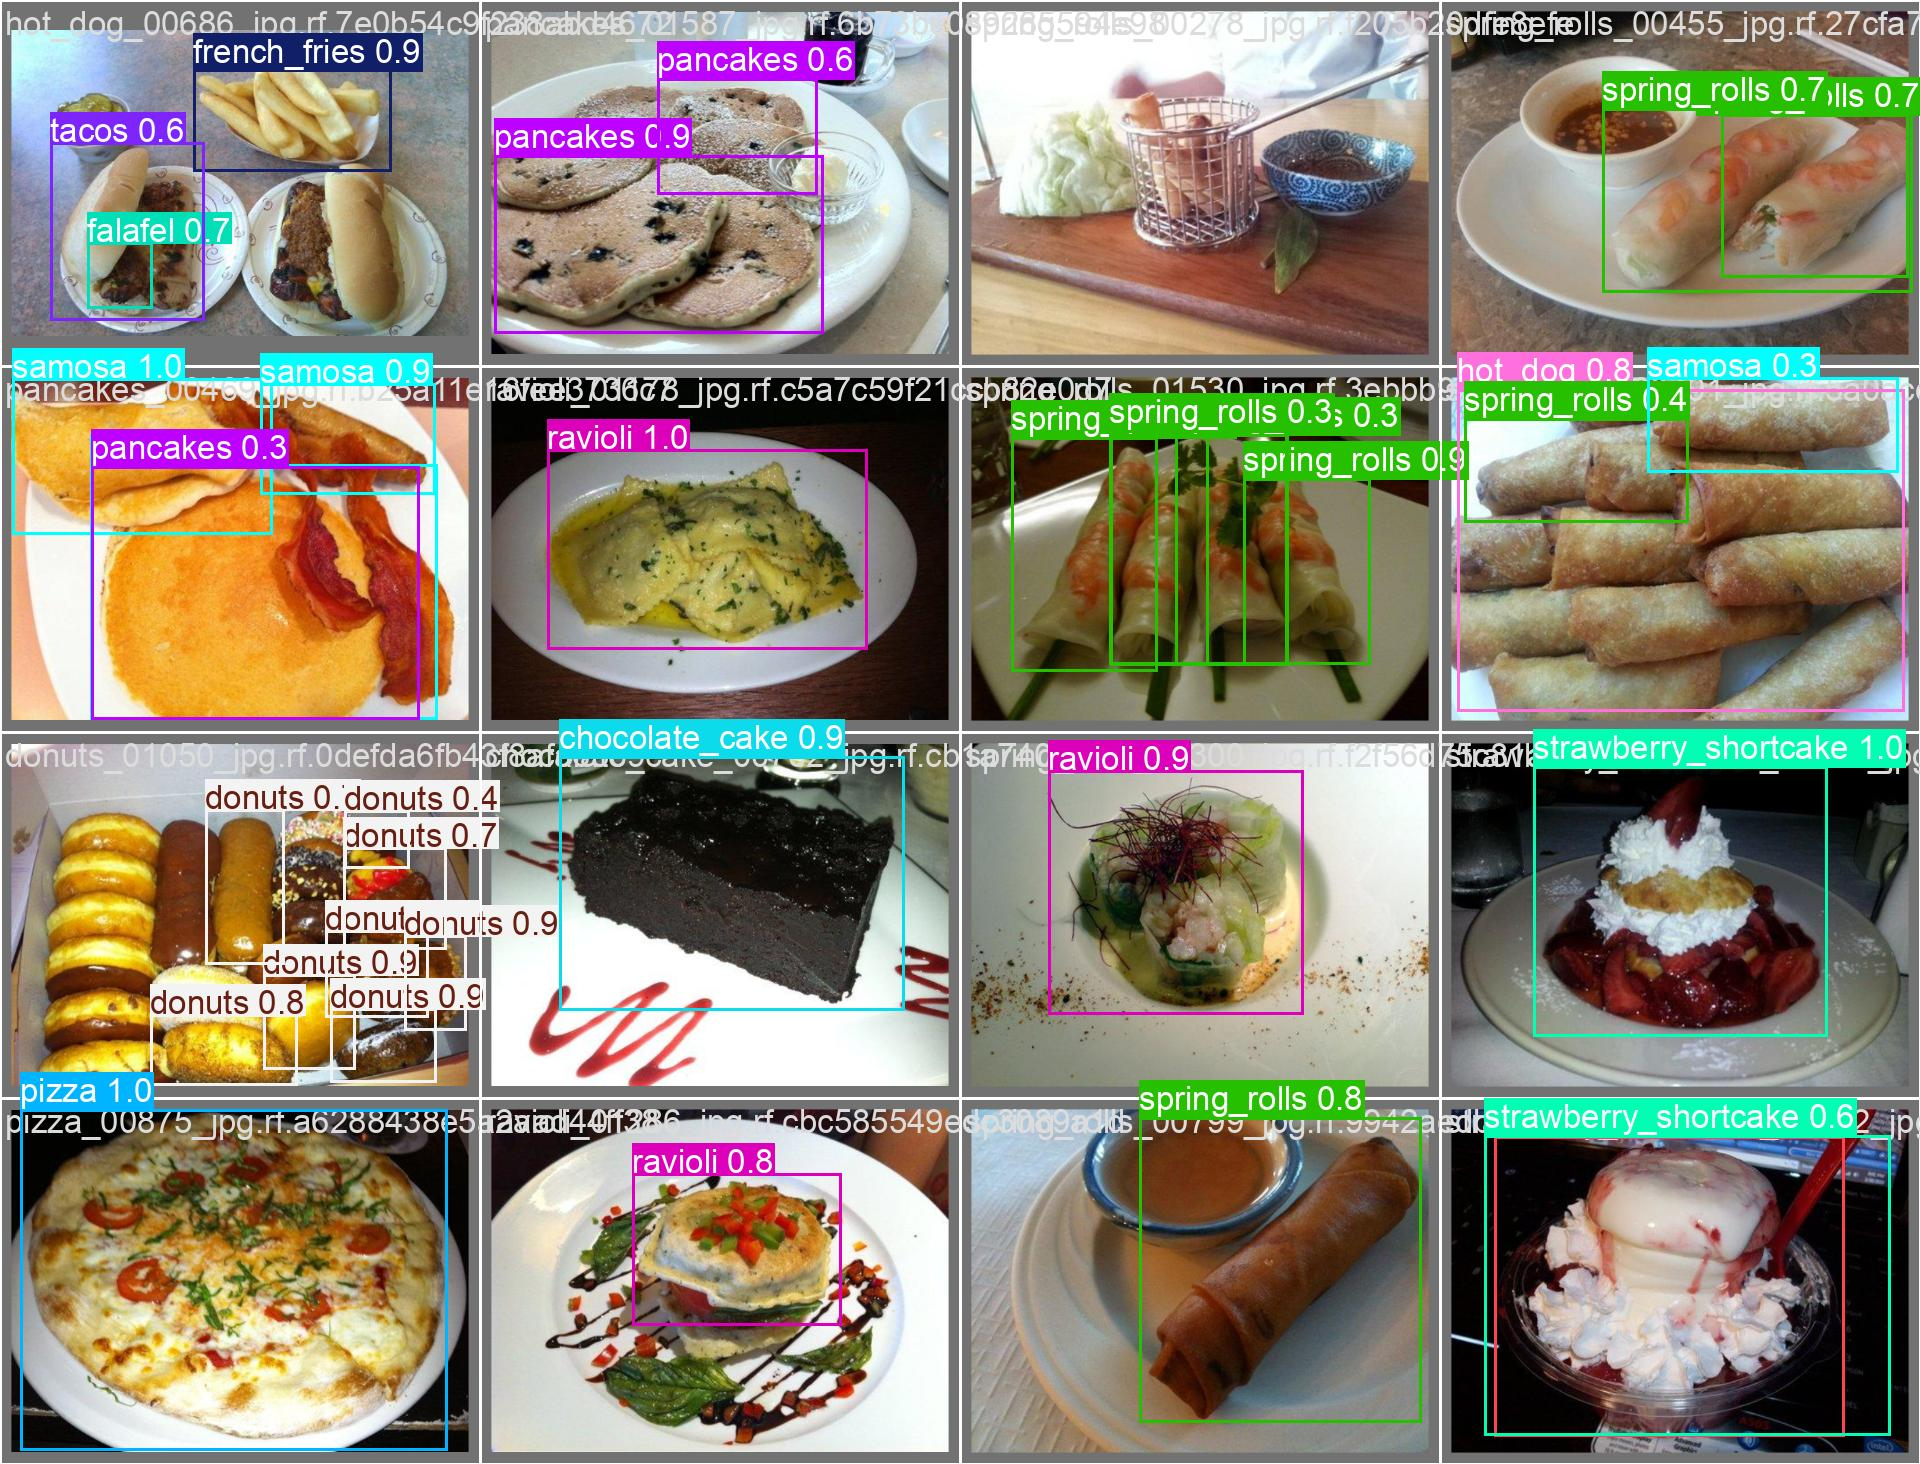

Displaying runs/detect/train2/val_batch0_pred.jpg


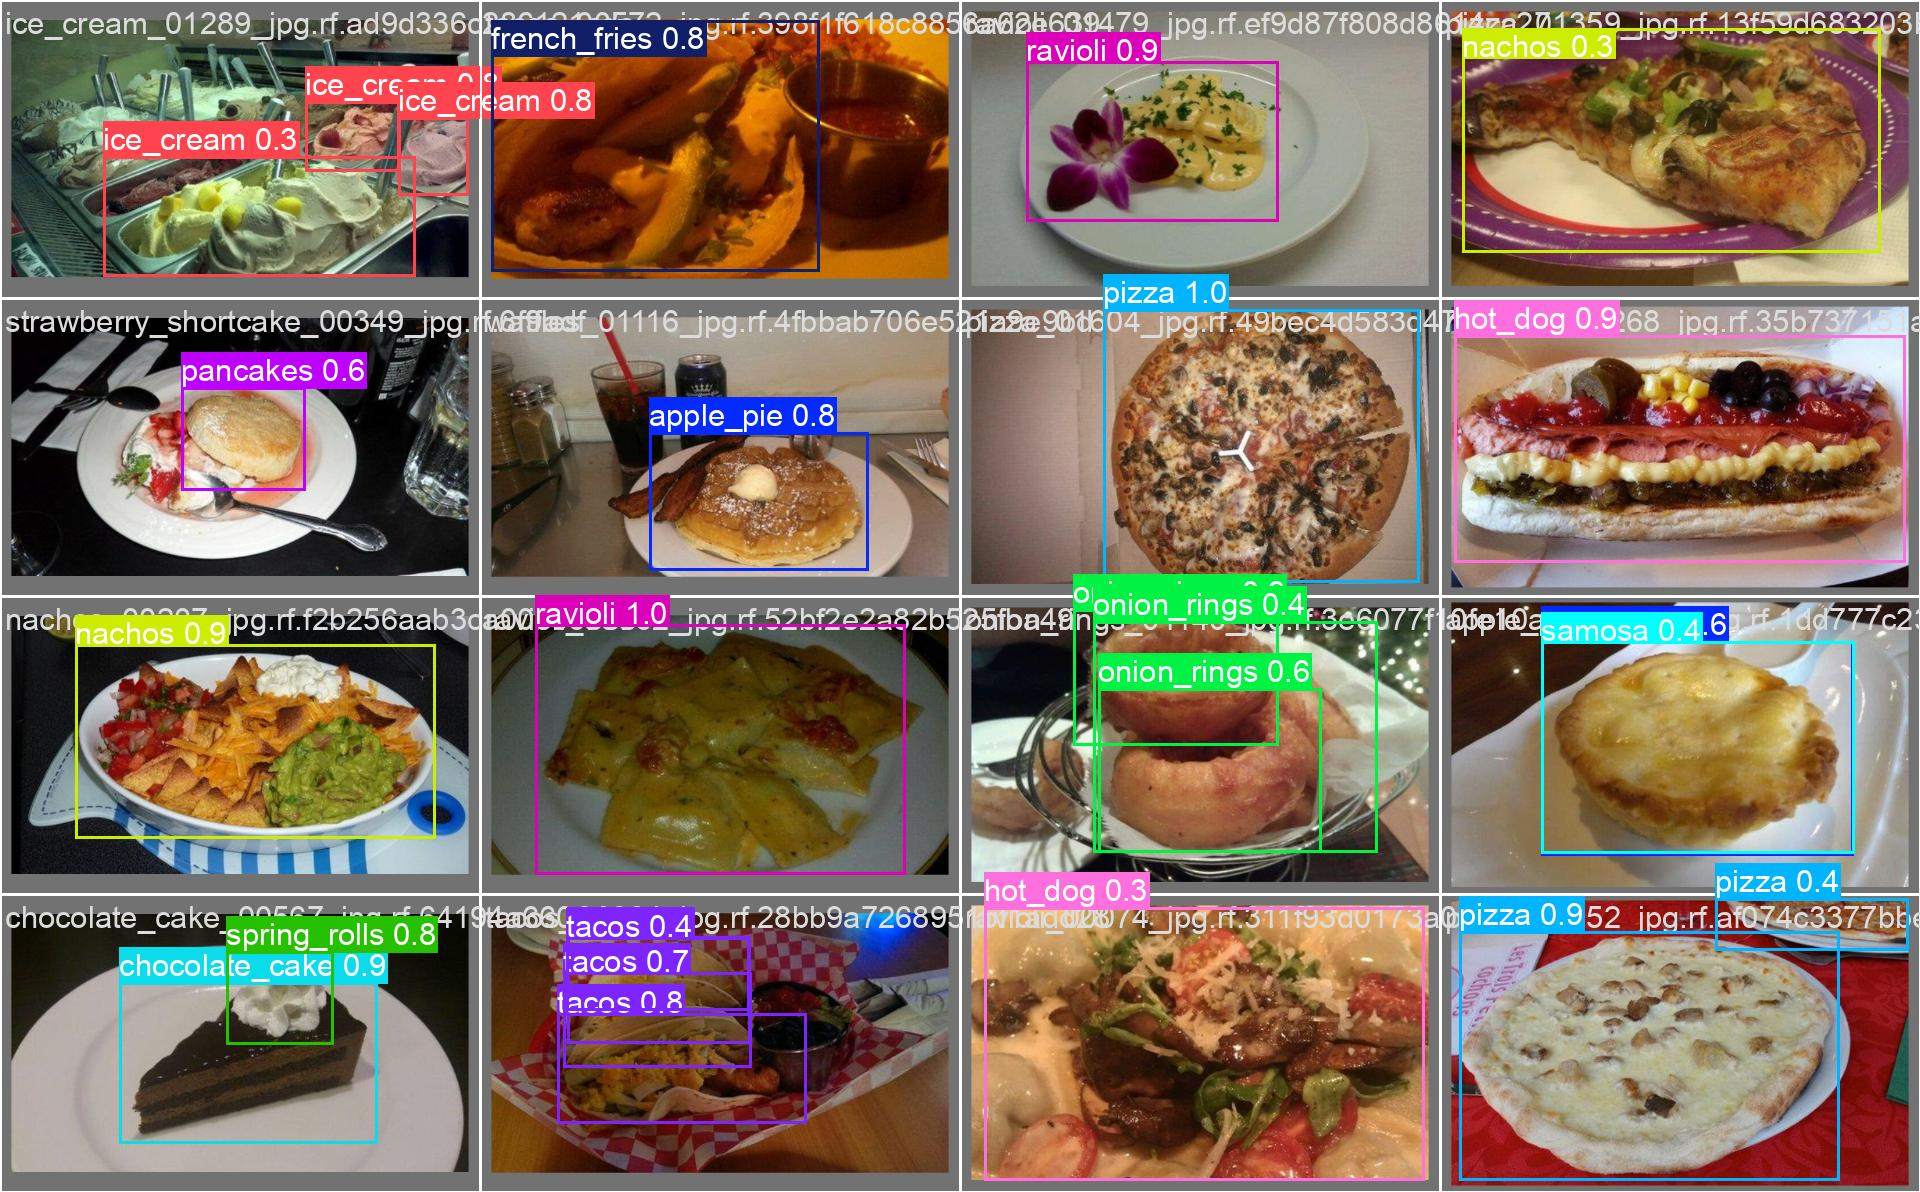

Displaying runs/detect/train2/val_batch1_pred.jpg


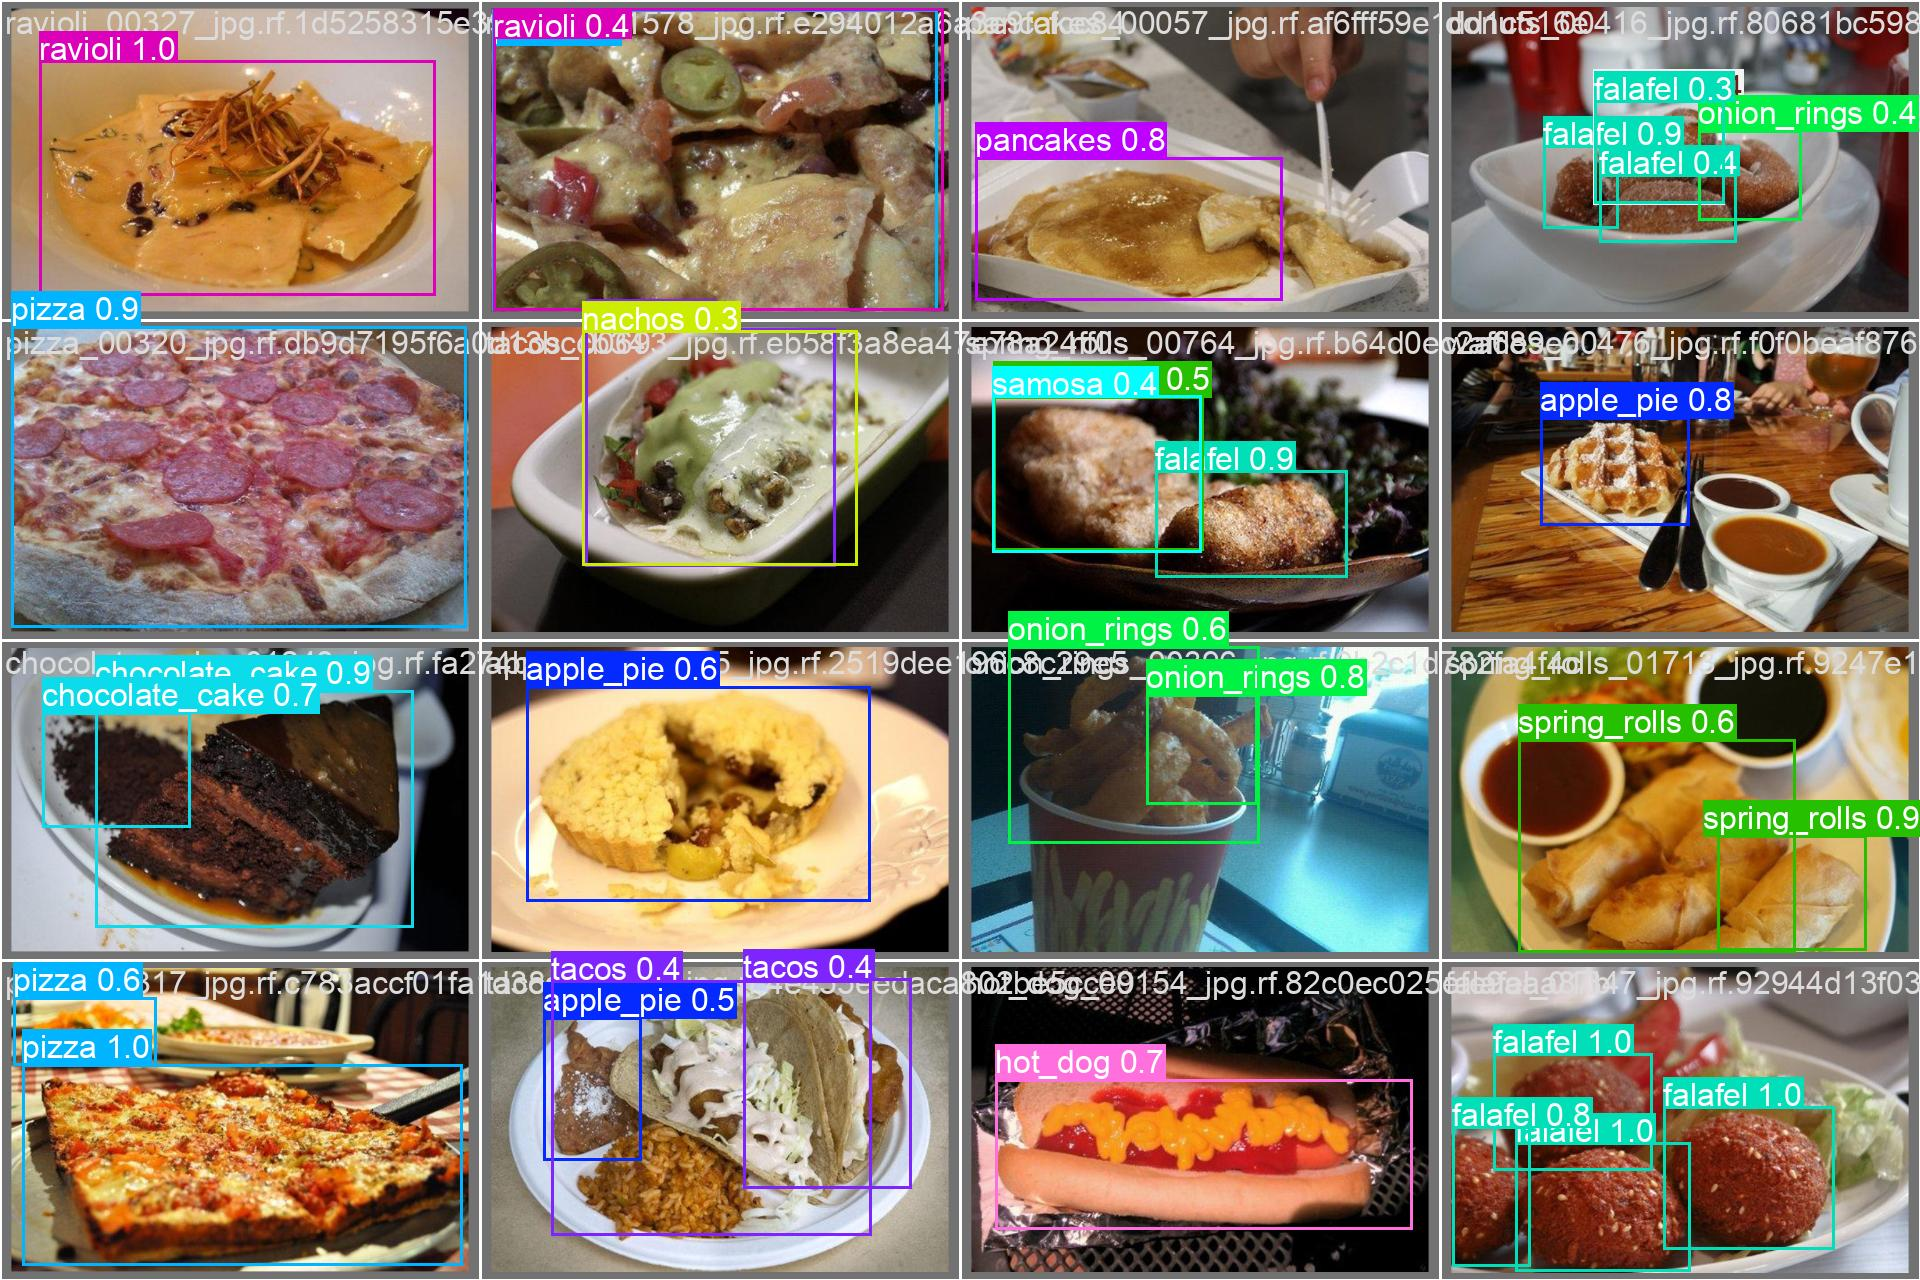

In [ ]:
import glob
from IPython.display import Image, display

# Get the list of image files in the detection results directory
# We can use glob to find the latest run directory
prediction_dir = glob.glob('runs/detect/*')[-1]
prediction_images = glob.glob(os.path.join(prediction_dir, '*.jpg'))

# Display the first 5 predicted images
for img_path in prediction_images[:5]:
    print(f"Displaying {img_path}")
    display(Image(filename=img_path))

### Exporting the YOLOv8 model to TensorFlow Lite

In [ ]:
# # Change to the ultralytics directory if you are not already there
# %cd /content/ultralytics

# # Define the path to your trained model weights
# # Replace 'train2' with the actual name of your training run directory
# trained_yolov8_model_path = '/content/ultralytics/runs/detect/train/weights/best.pt' # Or last.pt if you prefer the last checkpoint

# # Load the trained YOLOv8 model
# model = YOLO(trained_yolov8_model_path)

# # Export the model to TensorFlow Lite format
# # The exported model will be saved in the same directory as the weights
# export_results = model.export(format='tflite')

# print(f"YOLOv8 model exported successfully to: {export_results}")

Cloning into 'weights-and-best-checkpoint'...
Host key verification failed.
fatal: Could not read from remote repository.

Please make sure you have the correct access rights
and the repository exists.


# Deployment to HUGGINGFACE



In [ ]:
!git clone https://huggingface.co/spaces/shyn1/food-detector

Cloning into 'food-detector'...
remote: Enumerating objects: 4, done.
remote: Total 4 (delta 0), reused 0 (delta 0), pack-reused 4 (from 1)
Unpacking objects: 100% (4/4), 1.30 KiB | 1.30 MiB/s, done.


Make an folder that contain example images to use on hugginface

In [ ]:
#

import os
import shutil
import glob

# Define the directory for example images
example_images_dir = 'huggingface_examples'
os.makedirs(example_images_dir, exist_ok=True)

# Define the path to the validation images
validation_images_path = os.path.join(dataset_path, 'valid', 'images')

# Get a list of some example images from the validation set
example_images = glob.glob(os.path.join(validation_images_path, '*'))[:10] # Get the first 5 images

# Copy the example images to the new directory
for img_path in example_images:
    shutil.copy(img_path, example_images_dir)

print(f"Created '{example_images_dir}' and copied {len(example_images)} example images.")

Created 'huggingface_examples' and copied 10 example images.


helper function

In [ ]:
import gradio as gr
import cv2
import requests
import os

from ultralytics import YOLO

# Load the trained YOLOv8 model
model = YOLO('/content/ultralytics/runs/detect/train/weights/best.pt')

path = h